# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observable Trends

* It does in fact, get hotter as one travels from North or South towards the equator.  However, the hottest temperature cities are actually nearest The Tropic of Cancer (23.5 degrees north) and not the equator.
<img src="../output_data/Fig1.png?2">
* There does not seem to be any relationship between coludiness and latitude.  Clouds appear to be distributed in "bands" from the antarctic circle (66.5 degrees south) to the artic circle (66.5 degrees north)
<img src="../output_data/Fig3.png?2">
* It tends to get more windy as one travels away from the equator.  This is a bit of a weak trend but holds true for either North or South travel
<img src="../output_data/Lat_Wind Speed_South.png?2" align="left"/><img src="../output_data/Lat_Wind Speed_North.png?2" align="left"/>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# I've added the URL and units into the string rather than call them as URL & Units like in class
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# lists for appending the data needed for the dataframe from each city
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date =[] 
Place_Name = []

# if a city is unavailable it is listed as " 'cod': '404' " in the response " 'cod': 200 " if available
# why are these divided into sets in the example?  What do the sets represent? It is an unnecessary complication 
# and made the code more confusing for me.
print("Beginning Data Retrieval")
print("-------------------------")
sets = 1
city_count = 1
# looping through each city to check for and collect data and print and add to sets(?) 
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == '404': # if there is no data for the city...
        print("City not found. Skipping...") # skip it
    else:                                    # if the city has data then capture it in lists
# "ValueError: arrays must all be same length" can't use the cities list from above because of 404s
        Place_Name.append(city)
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt']) #god forbid it is called date or somthing crazy like that
        
        if city_count <= 50:        # okay for sets if the city_count number is less than 50....
            print(f"Processing Record {city_count} of Set {sets} | {city}") #print this and add 1 to city_count...
            city_count += 1 
        else:                       # otherwise create a new set and print the data (makes sets of 50 (0 to 49))
            city_count = 0          # I know python starts counting at 0 but people don't.  But the example used 0 so...
            sets += 1
            print(f"Processing Record {city_count} of Set {sets} | {city}")
            city_count += 1            
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | broken hill
Processing Record 5 of Set 1 | gorontalo
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | alugan
City not found. Skipping...
Processing Record 9 of Set 1 | fairbanks
Processing Record 10 of Set 1 | sokoni
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | margate
Processing Record 15 of Set 1 | amahai
Processing Record 16 of Set 1 | srednekolymsk
Processing Record 17 of Set 1 | auki
Processing Record 18 of Set 1 | zelenoborskiy
Processing Record 19 of Set 1 | rocha
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | moanda
Processing 

Processing Record 30 of Set 4 | chuy
Processing Record 31 of Set 4 | pangnirtung
City not found. Skipping...
Processing Record 32 of Set 4 | avera
City not found. Skipping...
Processing Record 33 of Set 4 | bartica
City not found. Skipping...
Processing Record 34 of Set 4 | banda aceh
Processing Record 35 of Set 4 | vila velha
Processing Record 36 of Set 4 | kahului
Processing Record 37 of Set 4 | yulara
Processing Record 38 of Set 4 | vestmannaeyjar
City not found. Skipping...
Processing Record 39 of Set 4 | saint-pierre
Processing Record 40 of Set 4 | monrovia
Processing Record 41 of Set 4 | filingue
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | chapais
Processing Record 44 of Set 4 | alice springs
Processing Record 45 of Set 4 | ankang
Processing Record 46 of Set 4 | muros
City not found. Skipping...
Processing Record 47 of Set 4 | egvekinot
Processing Record 48 of Set 4 | yaypan
Processing Record 49 of Set 4 | japura
Processing Record 50 of Set 4 | stokmar

Processing Record 10 of Set 8 | pokhara
Processing Record 11 of Set 8 | sajanan
City not found. Skipping...
Processing Record 12 of Set 8 | giddalur
Processing Record 13 of Set 8 | price
Processing Record 14 of Set 8 | tulsipur
Processing Record 15 of Set 8 | araceli
Processing Record 16 of Set 8 | kisangani
Processing Record 17 of Set 8 | waingapu
Processing Record 18 of Set 8 | muhos
Processing Record 19 of Set 8 | barra do garcas
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 8 | ancud
Processing Record 21 of Set 8 | winnetka
Processing Record 22 of Set 8 | awjilah
Processing Record 23 of Set 8 | ushumun
Processing Record 24 of Set 8 | ahja
Processing Record 25 of Set 8 | padang
Processing Record 26 of Set 8 | santa maria
City not found. Skipping...
Processing Record 27 of Set 8 | beloha
City not found. Skipping...
Processing Record 28 of Set 8 | actopan
Processing Record 29 of Set 8 | joshimath
Processing Record 30 of Set 8 | pajan
Processing Re

Processing Record 45 of Set 11 | pafos
Processing Record 46 of Set 11 | nemuro
Processing Record 47 of Set 11 | manokwari
Processing Record 48 of Set 11 | los lunas
Processing Record 49 of Set 11 | roros
Processing Record 50 of Set 11 | berberati
-------------------------
Data Retrieval Complete
-------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# taken pretty much directly from the classwork file
weather_dict = {"City": Place_Name,"Lat": Lat,"Lng": Lng, "Max Temp": Max_Temp, "Humidity": Humidity, 
                "Cloudiness": Cloudiness, "Wind Speed": Wind_Speed, "Country": Country, "Date": Date}
weather_data = pd.DataFrame(weather_dict)
# I found a few NAs going through this one time so I'll clean them here
weather_data = weather_data.dropna()
weather_data.to_csv(output_data_file, encoding='utf-8', index=True)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuura,35.13,140.30,61.00,55,20,17.22,JP,1587834222
1,punta arenas,-53.15,-70.92,39.00,64,51,11.99,CL,1587834211
2,saint-philippe,-21.36,55.77,77.00,83,20,6.17,RE,1587834222
3,broken hill,-31.95,141.43,73.40,28,90,12.75,AU,1587834223
4,gorontalo,0.54,123.06,76.53,87,97,2.59,ID,1587834223
...,...,...,...,...,...,...,...,...,...
555,nemuro,43.32,145.57,43.83,87,100,21.88,JP,1587834314
556,manokwari,-0.87,134.08,80.96,72,100,5.35,ID,1587834315
557,los lunas,34.81,-106.73,66.00,25,1,6.29,US,1587834315
558,roros,62.57,11.38,35.60,93,90,14.99,NO,1587834315


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Creates a new dataframe that includes all rows where the value of a cell in Humidity column is less than or = 100
# if there are none none the dataframes are the same.  Excludes Humidity >100 from new Dataframe

weather_clean = weather_data[weather_data.Humidity <= 100]
weather_clean.head()

# this code could be used to check if there are any over 100 in Humidity column
# from my homework last week (I know .describe below works too)
# just100plus = weather_data.loc[weather_data['Humidity'] > 100, :]
# just100plus

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuura,35.13,140.30,61.00,55,20,17.22,JP,1587834222
1,punta arenas,-53.15,-70.92,39.00,64,51,11.99,CL,1587834211
2,saint-philippe,-21.36,55.77,77.00,83,20,6.17,RE,1587834222
3,broken hill,-31.95,141.43,73.40,28,90,12.75,AU,1587834223
4,gorontalo,0.54,123.06,76.53,87,97,2.59,ID,1587834223


In [7]:
# i'm not sure why all of these extra steps, my code above removes them.  Max Temp would show any over 100 in Humidity
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,18.127893,16.998857,63.460696,66.053571,52.016071,8.252571,1.587834e+09
std,33.666337,91.402418,20.765156,22.185202,36.890712,5.287713,7.553095e+01
min,-54.800000,-179.170000,-4.000000,5.000000,0.000000,0.490000,1.587834e+09
25%,-10.632500,-66.410000,50.000000,52.000000,19.000000,4.160000,1.587834e+09
50%,20.795000,22.000000,67.955000,70.000000,53.000000,7.440000,1.587834e+09
75%,45.862500,102.352500,79.712500,83.000000,90.000000,11.410000,1.587834e+09
max,78.220000,179.320000,107.600000,100.000000,100.000000,34.000000,1.587834e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
# okay i figured it out.  Interesting.  My first code still works without extra steps
idx = weather_data.index[weather_data['Humidity']> 100]
idx

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.copy()

In [12]:
# Extract relevant fields from the data frame

# I did it but it took a few hours and I don't think it is the way you want. Especially since I had to use inplace=True
# I checked that it worked by changing Humidity to == 100 above since I had a df with none over 100
# so now "clean_city_data" and "weather_clean" and "weather_data" all have the same information
# BTW my code at the top removes the data without all of the extra steps (if I had not mentioned that)

x =0
for indexes in idx:
    drop = indexes - x
    clean_city_data.drop(clean_city_data.index[drop],inplace=True)
    x = x +1    #using x to shift the number of the index in idx as rows are deleted

# I fixed the date format to use in the charts below (I like dashes in dates).  
# I did this as try/except because if you try to run it twice you get an error (because the date is already changed)

try:
    clean_city_data['Date'] = pd.to_datetime(clean_city_data['Date'].astype(int), unit='s')
    clean_city_data['Date'] = clean_city_data['Date'].dt.strftime('%m-%d-%y')
except:
    print("Dates have already been updated to something American humans can understand. (Sorry dd-mm-yy folks).")
    
#Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, encoding='utf-8', index=False)
clean_city_data.head()

Dates have already been updated to something American humans can understand. (Sorry dd-mm-yy folks).


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuura,35.13,140.30,61.00,55,20,17.22,JP,04-25-20
1,punta arenas,-53.15,-70.92,39.00,64,51,11.99,CL,04-25-20
2,saint-philippe,-21.36,55.77,77.00,83,20,6.17,RE,04-25-20
3,broken hill,-31.95,141.43,73.40,28,90,12.75,AU,04-25-20
4,gorontalo,0.54,123.06,76.53,87,97,2.59,ID,04-25-20


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

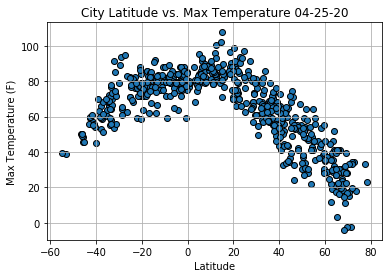

In [13]:
# Plotting Latitude vs. Temp, with a grid and titles like the example and saving.  Also date is dynamic in title.

plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], marker="o", edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature {clean_city_data.iloc[1, 8]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("../output_data/Fig1.png")
plt.show()

* Looking at recient Max Temperatures, Cities nearest The Tropic of Cancer. (23.5 degrees north) have the hottest temperatures while the equatorial cities (0 degrees Latitude) are actually cooler

## Latitude vs. Humidity Plot

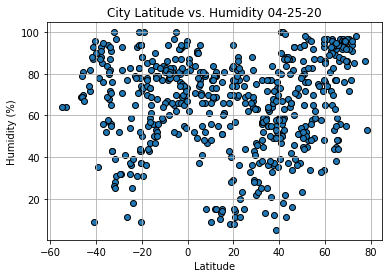

In [14]:
# Plotting Latitude vs. Humidity, with a grid and titles like the example and saving.  Also date is dynamic in title.

plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], marker="o", edgecolor="black")
plt.title(f"City Latitude vs. Humidity {clean_city_data.iloc[1, 8]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../output_data/Fig2.png")
plt.show()

* Humidity does not appear to be dependent on Latitude.  Cities from the antarctic circle. (66.5 degrees south) to those above the arctic circle (66.5 degrees north) have high Humidity.  Lower humidity does seem to currently be a northern hemisphere phenomenon  

## Latitude vs. Cloudiness Plot

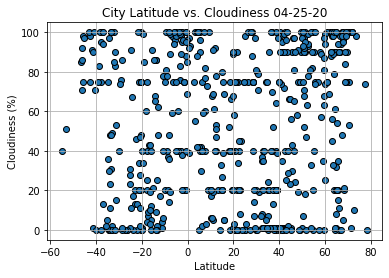

In [15]:
# Plotting Latitude vs. Cloudiness, with a grid and titles like the example and saving.  Also date is dynamic in title.

plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], marker="o", edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness {clean_city_data.iloc[1, 8]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../output_data/Fig3.png")
plt.show()

* Frankly I wonder if Cloudiness vs. Humidity would be better here.  High and low cloudiness bands seem to be spread accross all Latitudes with plenty in between 

## Latitude vs. Wind Speed Plot

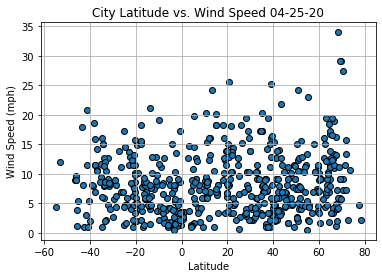

In [16]:
# Plotting Latitude vs. Wind Speed, with a grid and titles like the example and saving.  Also date is dynamic in title.

plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], marker="o", edgecolor="black")
plt.title(f"City Latitude vs. Wind Speed {clean_city_data.iloc[1, 8]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("../output_data/Fig4.png")
plt.show()

* The breeze seems consitant accross the globe.  Higher outliers may be due to storms

## Linear Regression

The r-squared is: -0.617517052068675


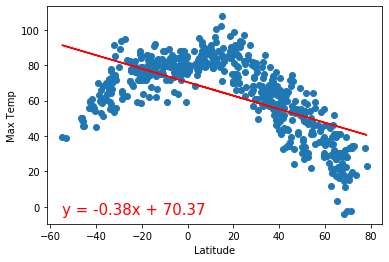

<Figure size 432x288 with 0 Axes>

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
# I don't beleive I got this to work!  code in the funciton is snagged from class file  with some adjustments
# getting the xy values to work with Northern and Southern data was a pain.  I will pat myself on the back for this one.

def linear_regres(x_values, y_values, direction):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(x_values.min(),y_values.min()),fontsize=15,color="red") 
    if x_values.name == 'Lat':
        plt.xlabel('Latitude')
    else:
        plt.xlabel(x_values.name)#I just wanted to see if I could do this. I realise it should be for yvalues and Lng too   
    plt.ylabel(y_values.name)
    print(f"The r-squared is: {rvalue}")
    save_name = f"../output_data/{x_values.name}_{y_values.name}_{direction}.png"
    fig1 = plt.gcf() # thanks internet for showing me this part.  I figured out save_name on my own
    plt.show()
    plt.draw()
    fig1.savefig(save_name)
    
# Sample   
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]
direction = 'North' #I need direction to save the files under different names.  I can't figure out how to do this dynamic
linear_regres(x_values, y_values, direction)

In [18]:
# Create Northern and Southern Hemisphere DataFrames
# I used this same code above to remove over 100% Humidity

Northern_Hemisphere = clean_city_data[clean_city_data.Lat >=0]
Southern_Hemisphere = clean_city_data[clean_city_data.Lat <0]
print("These are Southern Hemisphere cities")
Southern_Hemisphere.head()

These are Southern Hemisphere cities


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,punta arenas,-53.15,-70.92,39.0,64,51,11.99,CL,04-25-20
2,saint-philippe,-21.36,55.77,77.0,83,20,6.17,RE,04-25-20
3,broken hill,-31.95,141.43,73.4,28,90,12.75,AU,04-25-20
5,hithadhoo,-0.60,73.08,84.7,72,88,8.66,MV,04-25-20
6,ushuaia,-54.80,-68.30,39.2,64,40,4.38,AR,04-25-20


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8898057803553893


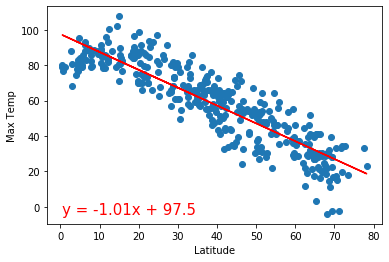

<Figure size 432x288 with 0 Axes>

In [19]:
# Cool, I just created this with the function that I made
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
direction = 'North'
linear_regres(x_values, y_values, direction)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6881691127363619


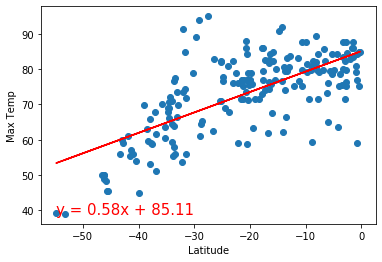

<Figure size 432x288 with 0 Axes>

In [20]:
# Printng "y=" was a challange here
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Max Temp"]
direction = 'South'
linear_regres(x_values, y_values, direction)

Negative regresion on the Northern cities while the Southern cities are positive. Closest to equator (0 in both) is hottest

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3000215777969265


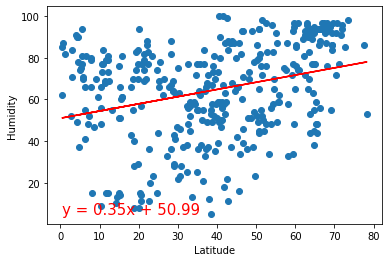

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
direction = 'North'
linear_regres(x_values, y_values, direction)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11090724570396424


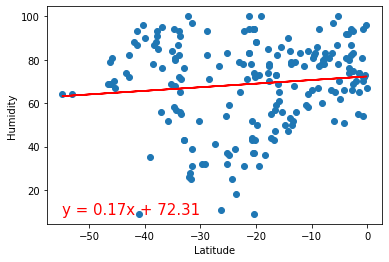

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Humidity"]
direction = 'South'
linear_regres(x_values, y_values, direction)

There is a weak uphill linear relationship between Humidity and Latitude in both hemispheres.  However, it does seem that humidity increases as you travel North.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17799543628138687


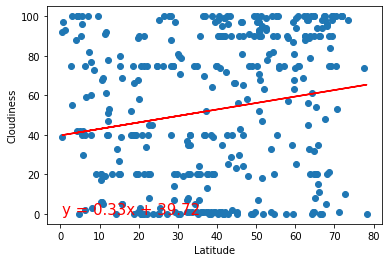

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
direction = 'North'
linear_regres(x_values, y_values, direction)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09049560354682966


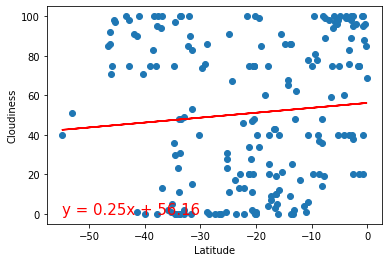

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Cloudiness"]
direction = 'South'
linear_regres(x_values, y_values, direction)

Again, week regression in both hemisphers, with cloudiness incressing as one goes North. Perhaps this would be different (or reversed) in differnt seasons

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07292034807307236


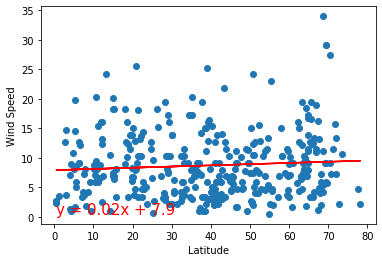

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
direction = 'North'
linear_regres(x_values, y_values, direction)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24339706090900565


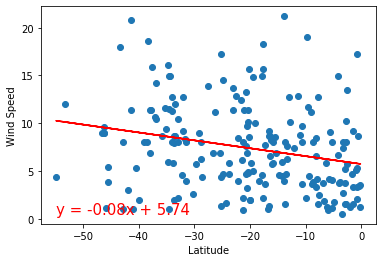

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Wind Speed"]
direction = 'South'
linear_regres(x_values, y_values, direction)

Interestingly, wind speed decreases as one travels from the antarctic circle to the equator (weak downhill regression in Southern hemisphere) and increases again as one travels North to the arctic circle (weak uphill regression in Northern hemisphere).